In [112]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

# Python Matplotlib toolkit
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [113]:
# # prepare the database file to be connected to later on.
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect (make a copy of) the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [114]:
# We can view all of the classes that automap found (tables)
Base.classes.keys()

['measurement', 'station']

In [115]:
 # Get a list of column names and types from the measurement table.
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [116]:
 # Get a list of column names and types from the station table.
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [117]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [118]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June.

session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6)


In [119]:
#  3. Convert the June temperatures to a list.
june_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [120]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 

june_temps_df = pd.DataFrame(june_temp, columns=['date','temperature'])


In [121]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [79]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.

session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12)



In [88]:
# 7. Convert the December temperatures to a list.
december_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [123]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_temps_df = pd.DataFrame(december_temp, columns=['date','temperature'])
december_temps_df


,date,temperature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [124]:
# 9. Calculate and print out the summary statistics for the December temperature DataFrame.
december_temps_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


(0.0, 400.0)

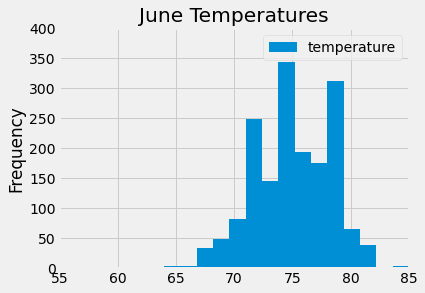

In [160]:
######### Plot June Temperatures ##########

# set the index to the date column
june_temps_df.set_index(june_temps_df['date'], inplace=True)
#june_temps_df

# Sort the dataframe by date
june_df = june_temps_df.sort_index()
#print(june_temps_df.to_string(index=False))

# create a plot
june_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('June Temperatures')
plt.xlim([55, 85])
plt.ylim([0,400])

(0.0, 400.0)

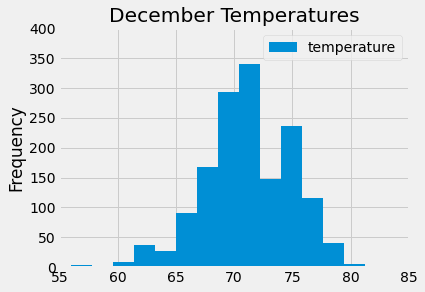

In [161]:
########## Plot December Temperatures ###########

# set the index to the date column
december_temps_df.set_index(december_temps_df['date'], inplace=True)
#december_temps_df


# Sort the dataframe by date
december_temps_df = december_temps_df.sort_index()
#print(december_temps_df.to_string(index=False))

# create a plot
december_temps_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('December Temperatures')
plt.xlim([55, 85])
plt.ylim([0,400])

In [154]:
###### Calcualte the summary statistics for June's precipitation data ######
june_precipitation_df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [155]:
###### Calcualte the summary statistics for December's precipitation data ######
december_precipitation_df.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000
